<a href="https://colab.research.google.com/github/katherymbr/PDI_4.TP4.Operaciones_de_Luminancia/blob/main/PDI_4_TP4_Operaciones_de_Luminancia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

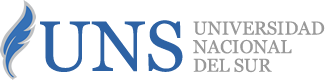

#PRÁCTICO NRO.4. PROCESAMIENTO DE IMÁGENES (PDI)

##*OPERACIONES DE LUMINANCIA*.

*  Generar una función que como parámetro de entrada tome la luminacia de una 
imagen y un numero entero de contadores y como salida obtengamos el histograma respectivo. Mostrar el histograma respectivo para 5 valores de contadores diferentes.

*  Buscar dos imágenes con problemas de iluminación (una oscura y otra muy brillante. Verificar la premisa de que al multiplicar la luminancia por un valor alfa, el problema de iluminación no se corrige.

*  Mostrar la imagen original, la resultante y sus respectivos histogramas, para un valor alfa dado.

*  Implementar las funciones: Lineal a trozos para un valor Y_min y Y_max como parámetros de la función, raíz cuadrada y potencia cuadrática. Para estas usar las imágenes anteriores y mostrar cómo cambio la imagen y el histograma después de aplicar el filtro a la imagen.



---


*NOMBRE: Katherym Bambague Ruíz*

In [50]:
# Importo las librerias

import numpy as np
import matplotlib.pyplot as plt
import imageio

In [51]:
def leer_imagen(rute):
    imagen= imageio.imread(rute)   
    return (imagen)

ruta= '/content/drive/MyDrive/'

In [52]:
# FUNCIÓN PARA GRAFICAR LAS 2 IMAGENES (verticales) 

def graficar_imagen(imagen, titulo, tamaño=100):
    fig, ax = plt.subplots(dpi=tamaño)
    ax.imshow(imagen)
    plt.title(str(titulo))
    plt.show

In [53]:

# FUNCIÓN PARA GRAFICAR 2 IMAGENES CON TÍTULO, PERO HORIZONTAL 
# /////REVISAR COMO HAGO PARA QUE ME SALGA EL TITULO EN LAS 2 IMÁGENES

def graficar_dosimagenes_horizontaltitulo(imagen_oscura, imagen_brillante, titulo1, titulo2, tamaño=100):
    fig, ax = plt.subplots(1,2, dpi=tamaño)
    ax[0].imshow(imagen_oscura, cmap='gray')  # DEBE SER LA IMAGEN DELA PADING, NO LA IMAGEN
    ax[0].set_axis_off()
    plt.title(str(titulo1))
    ax[1].imshow(imagen_brillante, cmap='gray')
    ax[1].set_axis_off()
    plt.title(str(titulo2))
    plt.show()
  

In [54]:
# FUNCION PARA SABER EL TAMAÑO DE LAS IMAGENES
def tamaño_imagen(imagen):
    fila,columna,canal=imagen.shape
    print('tamaño de la imagen', imagen.shape)
    return(fila,columna)

In [55]:
# FUNCIÓN PARA GRAFICAR 3 IMAGENES EN FORMA HORONTAL

def graficar_tresimagenes_horizontal(imagen_oscura, imagen_brillante, imagen_oscurapadding):
  fig, ax = plt.subplots(1, 3, dpi=400)
  ax[0].imshow(imagen_oscura, cmap='gray')  # DEBE SER LA IMAGEN DELA PADING, NO LA IMAGEN
  ax[0].set_axis_off()
  #print('imagen_1, imagen_2 , imagen_3')
  ax[1].imshow(imagen_brillante, cmap='gray')
  ax[1].set_axis_off()
  ax[2].imshow(imagen_oscurapadding, cmap='gray')
  ax[2].set_axis_off()
  plt.show()

In [56]:
# FUNCIÓN PARA DESCOMPONER LA IMAGEN EN SUS CANALES R,G,B

def image_to_rgb(imagen):
  r = imagen[:,:,0]/255.0
  g = imagen[:,:,1]/255.0
  b = imagen[:,:,2]/255.0
  return r, g, b

In [57]:
# FUNCIÓN PARA PASAR DE RGB A YIQ

def rgb_yiq (r1,g1,b1):

  y= 0.299*r1  +0.587*g1   +0.11*b1 
  i= 0.596*r1  -0.274*g1   -0.322*b1
  q= 0.211*r1  -0.523*g1   +0.312*b1
  return(y,i,q)

In [58]:
# FUNCIÓN PARA PASAR DE YIQ A RGB

def yiq_rgb(y1,i1,q1):

  r_inverso=  (y1 + 0.9663*i1 + 0.6210*q1)*255
  g_inverso=  (y1 - 0.2721*i1 - 0.6474*q1)*255
  b_inverso=  (y1 - 1.1070*i1 + 1.7046*q1)*255
  return (r_inverso, g_inverso, b_inverso)

*  EJECUTO LAS FUNCIONES

**PARTE 1**

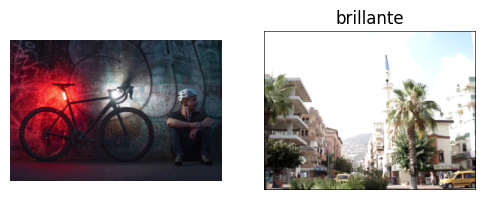

tamaño de la imagen (533, 800, 3)
tamaño de la imagen (225, 300, 3)


In [59]:
# LEO LAS IMAGENES CON LA FUNCIÓN y el tamaño de las imágenes

imagen_oscura=leer_imagen(ruta+'imagen_oscura1.jpg')
imagen_brillante=leer_imagen(ruta+'imagen_brillante2.png')

graficar_dosimagenes_horizontaltitulo(imagen_oscura, imagen_brillante, 'oscura', 'brillante', tamaño=100)

# TAMAÑO DE LAS IMAGENES
fila1, columna1= tamaño_imagen(imagen_oscura)
fila2, columna2= tamaño_imagen(imagen_brillante)

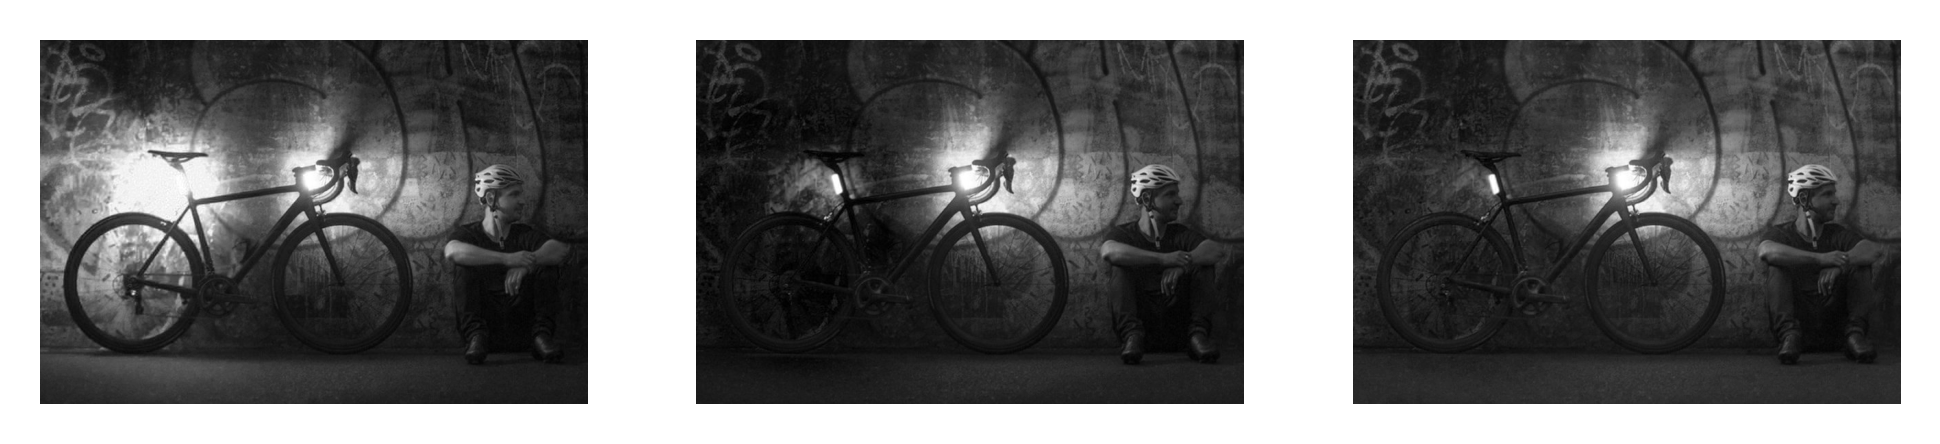

In [60]:
# Descompongo la Imagen oscura a RGB

r1,g1,b1= image_to_rgb(imagen_oscura)
graficar_tresimagenes_horizontal(r1, g1, b1)

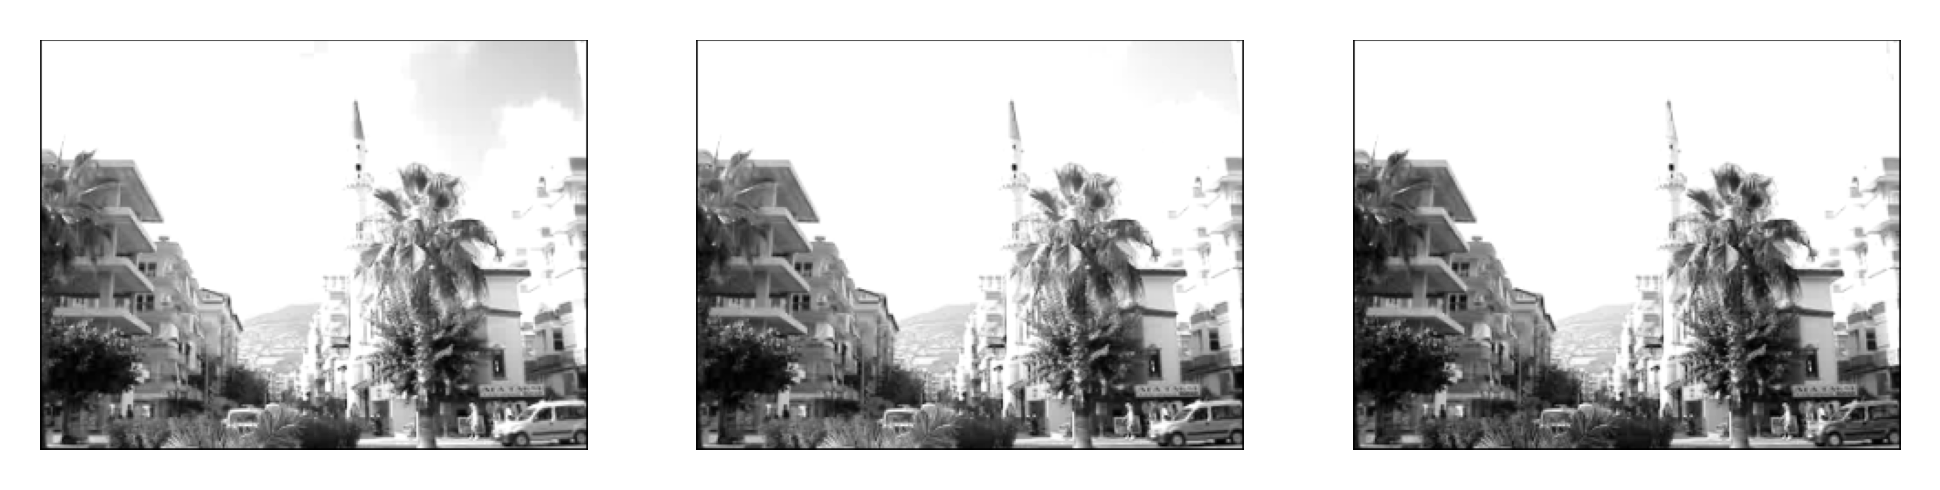

In [61]:
# Descompongo la Imagen brillante a RGB

r2,g2,b2= image_to_rgb(imagen_brillante)
graficar_tresimagenes_horizontal(r2, g2, b2)

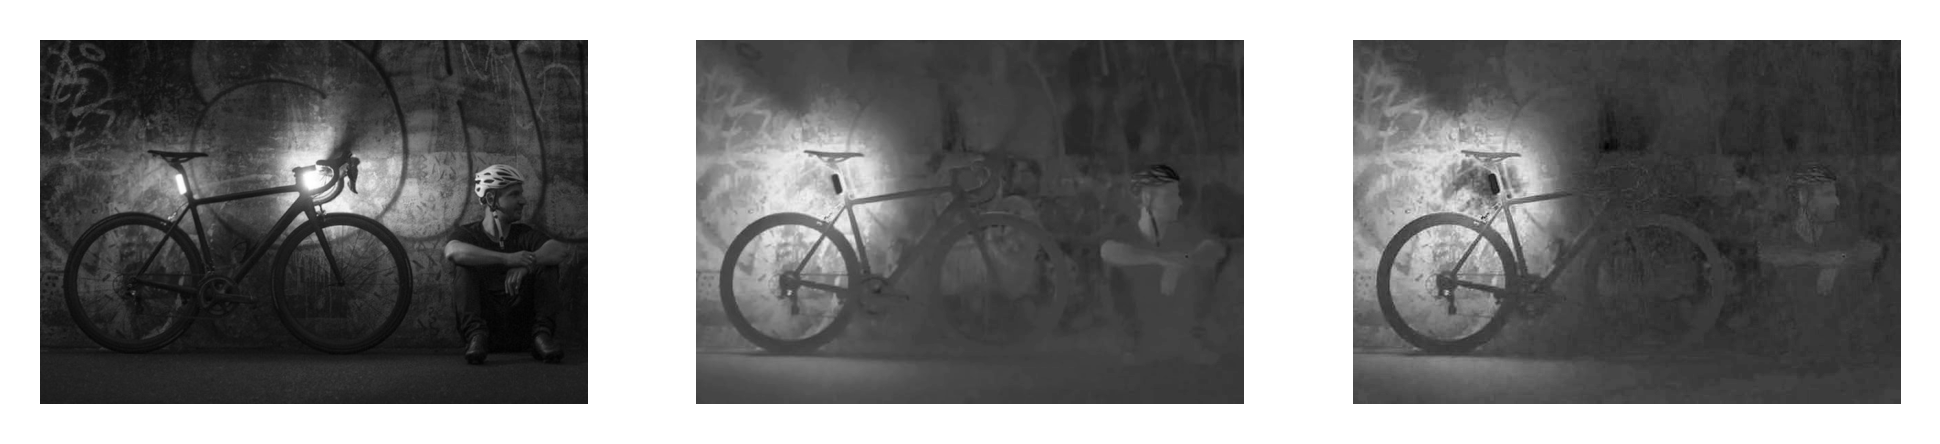

In [62]:
# función para pasar de rgb a YIQ . IMAGEN OSCURA

y1,i1,q1= rgb_yiq (r1,g1,b1)
np.clip(y1, 0, 1)
graficar_tresimagenes_horizontal(y1,i1,q1)


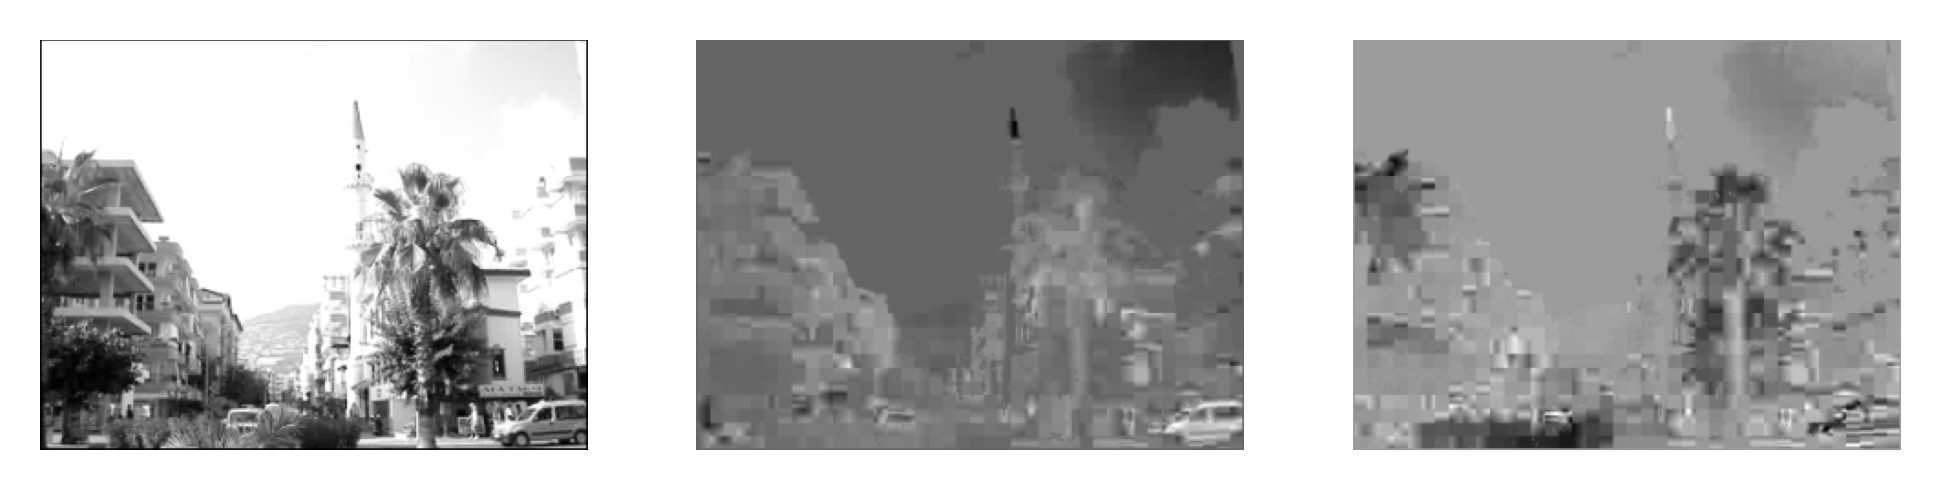

In [63]:
# función para pasar de rgb a YIQ . IMAGEN BRILLANTE

y2,i2,q2= rgb_yiq (r2,g2,b2)
np.clip(y2, 0, 1)
graficar_tresimagenes_horizontal(y2,i2,q2)

*  FUNCIÓN FRECUENCIAS DE UN HISTOGRAMA

In [64]:
# FUNCIÓN PARA CONSTRUIR LAS FRECUENCIAS DE UN HSITOGRAMA

def frecuencias(y1, bins):

    intervalo=np.linspace(0,1, bins+1)
    frecuencia=np.zeros(bins)
    print('frecuencia')
    for i in range(bins):
        #print(intervalo[i], intervalo[i+1])
        frecuencia[i]=((y1>=intervalo[i]) * (y1<intervalo[i+1])). sum()
        #print('frecuencia es', frecuencia[i])
        #print(intervalo[i+1])
    frecuencia[bins-1] += (y1==1).sum()  
    return(frecuencia,intervalo)


*  IMAGEN OSCURA, (Y1)

In [65]:
# EJECUCIÓN DE LA FUNCIÓN FRECUENCIAS DE UN HISTOGRAMA.
# GENERAR FRECUENCIAS PARA EL HISTOGRAMA DE LA IMAGEN OSCURA, ES DECIR Y1.

frecuencia1, intervalo1= frecuencias(y1 ,5)
print (frecuencia1, intervalo1)

frecuencia
[268640. 113707.  26859.  12076.   5118.] [0.  0.2 0.4 0.6 0.8 1. ]


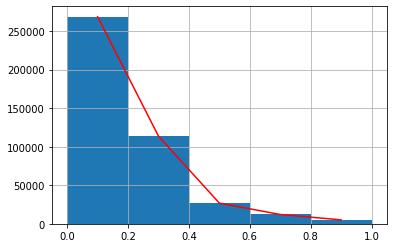

In [66]:
#Graficamos las luminancias de la imagen oscura, y1

plt.plot((intervalo1[1:]+intervalo1[:-1])/2, frecuencia1, color='red')
plt.bar((intervalo1[1:]+intervalo1[:-1])/2, frecuencia1, width=intervalo1[1]-intervalo1[0])
#plt.bar
plt.grid()

*  IMAGEN OSCURA, (Y2)

In [67]:
# EJECUCIÓN DE LA FUNCIÓN FRECUENCIAS DE UN HISTOGRAMA.
# GENERAR FRECUENCIAS PARA EL HISTOGRAMA DE LA IMAGEN BRILLANTE, ES DECIR Y2.

frecuencia2, intervalo2= frecuencias(y2,5)
print (frecuencia2, intervalo2)

frecuencia
[ 5968.  9184.  9084.  6641. 36623.] [0.  0.2 0.4 0.6 0.8 1. ]


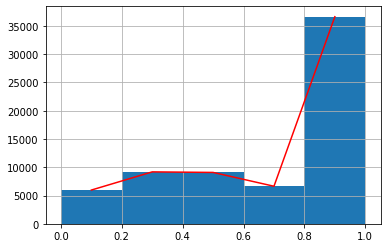

In [68]:
#Graficamos las luminancias de la imagen brillante, y2

plt.plot((intervalo2[1:]+intervalo2[:-1])/2, frecuencia2, color='red')
plt.bar((intervalo2[1:]+intervalo2[:-1])/2, frecuencia2, width=intervalo2[1]-intervalo2[0])
#plt.bar
plt.grid()


**PARTE 2**

seleccionó: Imagen_Oscura
seleccióno el factor: 0
A continuacion visualizará las siguientes imagenes: 1. imagen seleccionada, 2. imagen en el espacio Y, 3. imagen alterada por el factor, 4. Histograma de luminancia


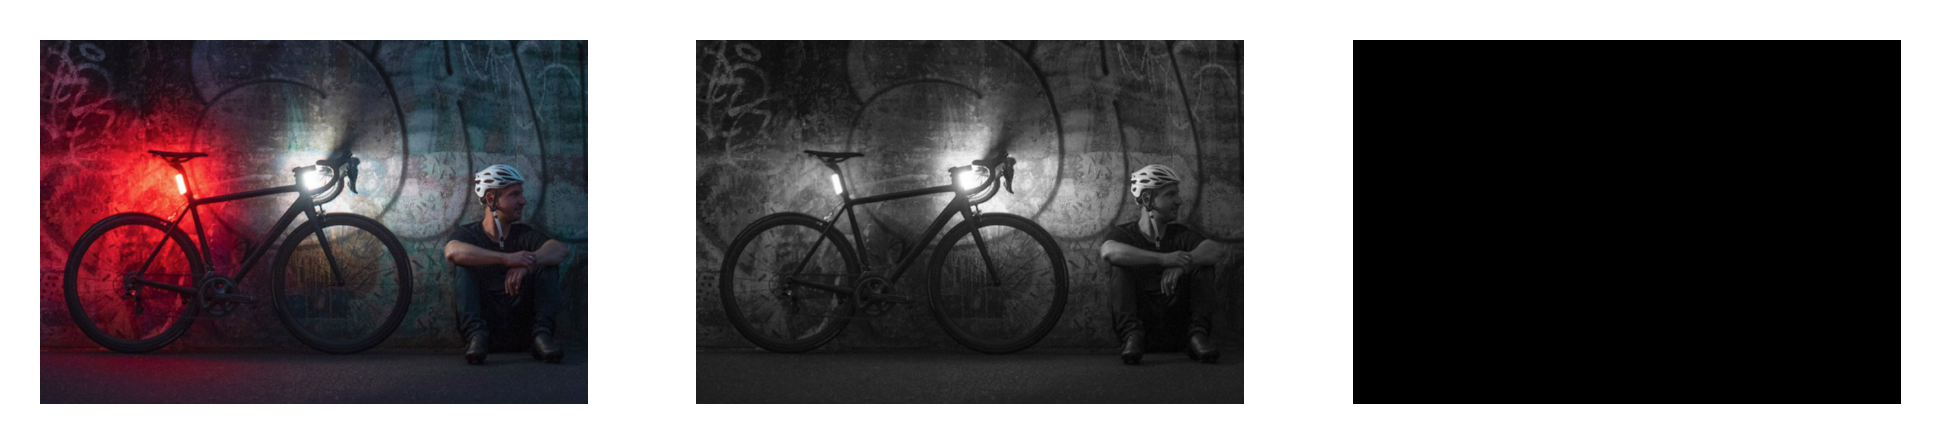

frecuencia


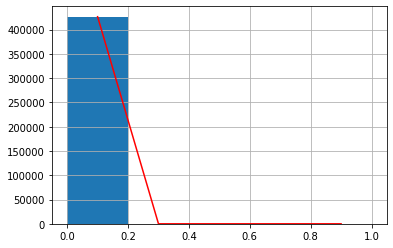

In [69]:
# SELECCIONO LA IMAGEN Y MODIFICO LA LUMINANCIA 

#@title SELECCIÓN DE LA IMAGEN Y MODIFICACIÓN DE LA LUMINANCIA. { run: "auto" }


#@title Elige una imagen  y un factor (w para modificar la luminancia) :  { run: "auto" }

Imagen_seleccionada= "Imagen_Oscura" #@param ["Imagen_Oscura", "Imagen_brillante"]
Factor_α = 0 #@param {type:"slider", min:0, max:5, step:0.1}

if  Imagen_seleccionada=="Imagen_Oscura": 
  print('seleccionó: Imagen_Oscura')
  print('seleccióno el factor:' ,Factor_α)
  Y_oscuro = y1*Factor_α
  print('A continuacion visualizará las siguientes imagenes: 1. imagen seleccionada, 2. imagen en el espacio Y, 3. imagen alterada por el factor, 4. Histograma de luminancia')
  graficar_tresimagenes_horizontal(imagen_oscura,y1,Y_oscuro)
  frecuencia3, intervalo3= frecuencias(Y_oscuro,5)
  plt.plot((intervalo3[1:]+intervalo3[:-1])/2, frecuencia3, color='red')
  plt.bar((intervalo3[1:]+intervalo3[:-1])/2, frecuencia3, width=intervalo3[1]-intervalo3[0])
  #plt.bar
  plt.grid()
else:
  print('seleccionó: Imagen_Brillante')
  Y_brillante2 = y2 * Factor_α
  print('A continuacion visualizará las siguientes imagenes: 1. imagen seleccionada, 2. imagen en el espacio Y, 3. imagen alterada por el factor, 4. Histograma de luminancia')
  graficar_tresimagenes_horizontal(imagen_brillante,y2,Y_brillante2)
  frecuencia4, intervalo4= frecuencias(Y_brillante2, 5)
  plt.plot((intervalo4[1:]+intervalo4[:-1])/2, frecuencia4, color='red')
  plt.bar((intervalo4[1:]+intervalo4[:-1])/2, frecuencia4, width=intervalo4[1]-intervalo4[0])
  #plt.bar
  plt.grid()

*  CONCUSIÓN: 
Realizando esta actividad podemos constatar como lo sabiamos previamnete de la teoría, que por mucho que intentemos multiplicar las luminancias por un
escalar, el resultado será “mover” el histograma, sin alterar el hecho  que muchos pixels tienen una luminancia similar.

*  FILTROS

Seleccionó: IMAGEN_OSCURA:
selecciono el filtro: RAIZ_CUADRADA
A continuacion visualizará las siguientes imagenes: 1. imagen seleccionada,  2. Espacio Y,  3.Imagen modificada por el filtro,  4.Histograma de Luminancia


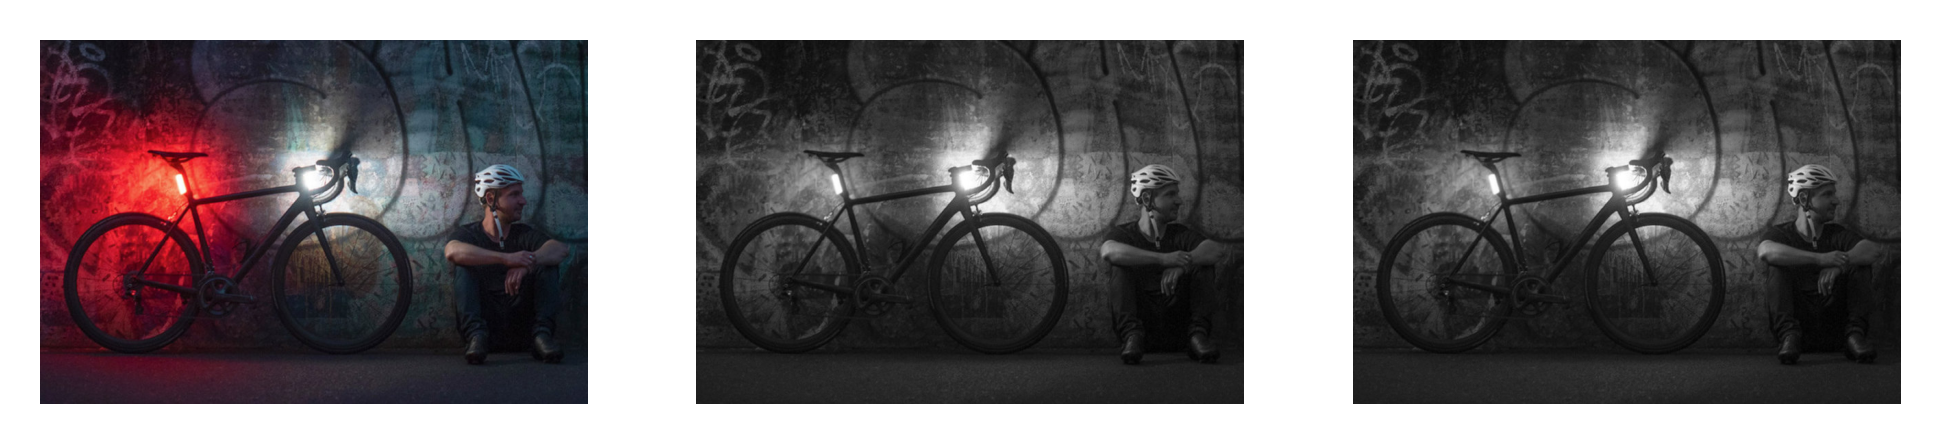

frecuencia


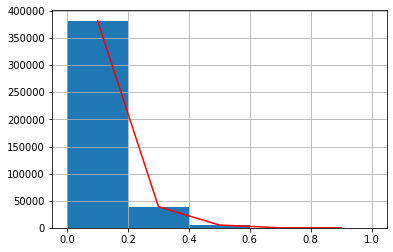

In [70]:
# SELECCIONO  IMAGEN Y ELIGO EL FILTRO

#@title SELECCIONO LA IMAGEN Y ELIGO EL FILTRO. { run: "auto" }


#@title Elige una imagen  y un factor (w para modificar la luminancia) :  { run: "auto" }

Imagen_seleccionada2= "Imagen_Oscura" #@param ["Imagen_Oscura", "Imagen_brillante"]
Filtro=  "raiz_cuadrada" #@param ["raiz_cuadrada", "potencia", "lineal_a_trozos"]
Factor_minimo = -7.4 #@param {type:"slider", min:-10, max:10, step:0.1}
Factor_maximo = 2.2 #@param {type:"slider", min:-10, max:10, step:0.1}

if  Imagen_seleccionada2=="Imagen_Oscura": 
  yop_imagen= np.copy(imagen_oscura)
  yop=y1
  print('Seleccionó: IMAGEN_OSCURA:')
  #plt.imshow( yop_imagen)
  #graficar_tresimagenes_horizontal(yop_imagen, yop, imagen_brillante)
  
else:
  Imagen_seleccionada2=="Imagen_brillante"
  yop_imagen= np.copy(imagen_brillante)
  yop=y2
  print('Seleccionó: IMAGEN_BRILLANTE:')
  #plt.imshow(yop_imagen)
  #graficar_tresimagenes_horizontal(yop_imagen, yop, imagen_oscura)

if Filtro== 'raiz_cuadrada':
  print('selecciono el filtro: RAIZ_CUADRADA')
  Y_filtro1= yop*0.5
  print('A continuacion visualizará las siguientes imagenes: 1. imagen seleccionada,  2. Espacio Y,  3.Imagen modificada por el filtro,  4.Histograma de Luminancia')
  graficar_tresimagenes_horizontal(yop_imagen, yop, Y_filtro1)
  frecuencia_cuadrado, intervalo_cuadrado= frecuencias(Y_filtro1,5)
  plt.plot((intervalo_cuadrado[1:]+intervalo_cuadrado[:-1])/2, frecuencia_cuadrado, color='red')
  plt.bar((intervalo_cuadrado[1:]+intervalo_cuadrado[:-1])/2, frecuencia_cuadrado, width=intervalo_cuadrado[1]-intervalo_cuadrado[0])
  #plt.bar
  plt.grid()
  #graficar_tresimagenes_horizontal(yop_imagen, yop, Y_filtro1)
elif Filtro== 'potencia':
  print('selecciono el filtro POTENCIA')
  Y_filtro2= yop**2
  print('A continuacion visualizará las siguientes imagenes: 1. imagen seleccionada,  2. Espacio Y,  3.Imagen modificada por el filtro,  4.Histograma de Luminancia')
  graficar_tresimagenes_horizontal(yop_imagen, yop, Y_filtro2)
  frecuencia_potencia, intervalo_potencia= frecuencias(Y_filtro2,5)
  plt.plot((intervalo_potencia[1:]+intervalo_potencia[:-1])/2, frecuencia_potencia, color='red')
  plt.bar((intervalo_potencia[1:]+intervalo_potencia[:-1])/2, frecuencia_potencia, width=intervalo_potencia[1]-intervalo_potencia[0])
  #plt.bar
  plt.grid()
elif Filtro=='lineal_a_trozos':
  print('selecciono el filtro LINEAL A TROZOS')
  m=1/(Factor_maximo-Factor_minimo)  # (m= dy/dx)
  b=-m*Factor_minimo
  print('A continuacion visualizará las siguientes imagenes: 1. imagen seleccionada,  2. Espacio Y,  3.Imagen modificada por el filtro, 4.Histograma de Luminancia')
  #yop = np.piecewise(yop, [yop<0, yop>=0],[lambda yop: , lambda yop: ])
  #plt.show()


*  CONCUSIÓN: 
Cuando aplicamos los filtros cuadrado y potencia, la imagen queda con mejor calidad, pero considerando los histogramas de luminancia y el comportamiento de estas 2 funciones, podemos observar que para imagenes  brillantes el filtro adecuado es potencia, mientras que para imagenes oscuras se suguire más el filtro raiz cuadrada, esto debido a que el comportamiento. 